# Regresión Logística para datos de COVID 19

Cargamos la tabla de datos de covid, que trae el indicador de si murió o no murió, las 5 comorbilidades más frecuentes, la edad
el sexo y el número de días entre inicio de síntomas e ingreso y si fue hospitalizado o entró a la UCI.

In [ ]:
#La tabla de datos se llama dfCovidPositivos.csv y se generó en la práctica del Bloque 2

In [18]:
#Importa las liberías utilizadas
import pandas as pd
import numpy as np

In [19]:
#Carga de datos
filename = 'C:/Users/jgeis/Documents/Claudia/Cursos/Impartidos/PythonParaCS/Bloque2  Limpieza de Datos y Análisis Descriptivo Univariado/dfCovidPositivos.csv'
df = pd.read_csv(filename, header=0)

In [20]:
df.columns

Index(['Muerto', 'EDAD', 'catEdad', 'SEXO', 'COMORBILIDADES', 'numComorb',
       'HOSPITALIZADO', 'UCI', 'INTUBADO', 'dias_sintomas_ingreso',
       'dias_ingreso_muerte', 'FECHA_INGRESO'],
      dtype='object')

In [50]:
#Basado en: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=278443377095&utm_targetid=aud-763347114660:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9073874&gclid=CjwKCAjw1JeJBhB9EiwAV612y36I1lEXJqew9jkflvuwWXFwDGoiparHZ3Alb-JAx2Ib_L3G3aNWQBoCDA8QAvD_BwE
#split dataset in features and target variable
feature_cols = ['EDAD', 'SEXO','HOSPITALIZADO','UCI','dias_sintomas_ingreso']
X = df[feature_cols].values # Features
y = df.Muerto # Target variable

In [52]:
X

array([[ 41.,   1.,   0.,   0.,   0.],
       [ 66.,   0.,   1.,   1.,   3.],
       [ 47.,   1.,   0.,   0.,   2.],
       ...,
       [ 38.,   1.,   0.,   0.,   0.],
       [ 47.,   0.,   0.,   0.,   0.],
       [121.,   1.,   0.,   0.,   0.]])

In [22]:
#!pip install sklearn

In [23]:
# split X and y into training and testing sets
#Ojo, este lo tuve que cambiar del original, en lugar de model_selection decía 
#cross_validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [24]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [25]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[802994,  22109],
       [ 34544,  33614]], dtype=int64)

In [26]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

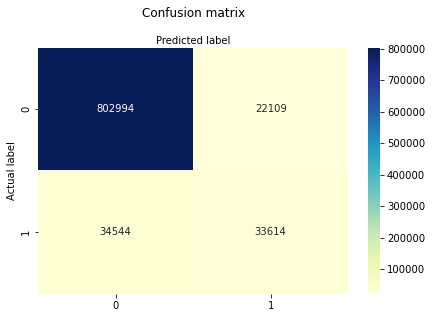

In [27]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9365773273432961
Precision: 0.603233853166556
Recall: 0.4931776167141055


# La curva ROC

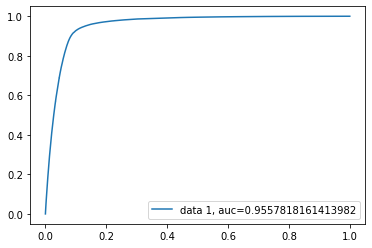

In [29]:
#ROC Curve
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

La curva ROC es un gráfico muy popular para desplegar de forma simultánea los dos tipos de errores para todos los posibles umbrales. El nombre “ROC” es histórico,
y viene de la teoría de comunicaciones. Es un acrónimo de receiver
operating characteristics. El desempeño de un clasificador, resumido sobre todos los posibles umbrales, está dado por el area bajo la curva (ROC) dado por AUC. Una curva ROC ideal se verá hacia arriba hacia la esquina superior izquierda, demo do que a mayor area bajo la curva ROC, mejor es el clasificador. Para estos datos el AUC es 0.953, que está cerca al máximo así que se considera muy bueno. Esperamos que un clasificador que no es mejor que un volado tenga una AUC de  0.5.

In [30]:
#AUC score for the case is 0.95. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

In [31]:
#USANDO el laboratorio de Clasificación del libro ISLR
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

import pandas.util.testing as tm

<ipython-input-31-55a8a1ef657a>:22: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


C:\Users\jgeis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jgeis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Muerto', ylabel='dias_sintomas_ingreso'>

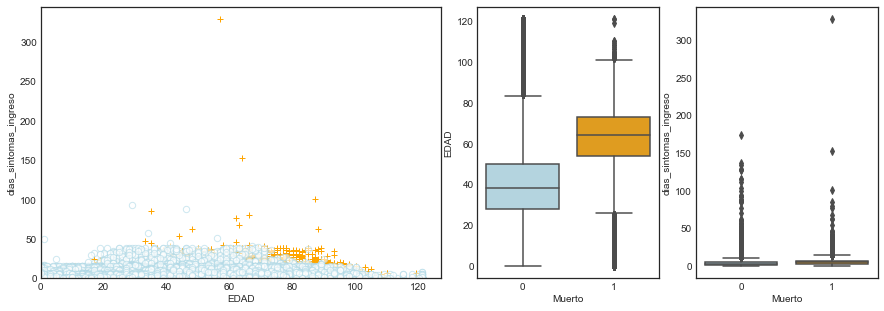

In [32]:
fig = plt.figure(figsize=(15,5))
gs = mpl.gridspec.GridSpec(1, 4)
ax1 = plt.subplot(gs[0,:-2])
ax2 = plt.subplot(gs[0,-2])
ax3 = plt.subplot(gs[0,-1])

# Take a fraction of the samples where target value (default) is 'no'
#En nuestro caso el valor default es equivalente a Muerto
df_no = df[df.Muerto == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.Muerto == 1]
df_ = df_no.append(df_yes)

ax1.scatter(df_[df_.Muerto == 1].EDAD, df_[df_.Muerto == 1].dias_sintomas_ingreso, s=40, c='orange', marker='+',
            linewidths=1)
ax1.scatter(df_[df_.Muerto == 0].EDAD, df_[df_.Muerto == 0].dias_sintomas_ingreso, s=40, marker='o',
            linewidths=1,edgecolors='lightblue', facecolors='white', alpha=.6)

ax1.set_ylim(ymin=0)
ax1.set_ylabel('dias_sintomas_ingreso')
ax1.set_xlim(xmin=0)
ax1.set_xlabel('EDAD')

c_palette = {0:'lightblue', 1:'orange'}
sns.boxplot('Muerto', 'EDAD', data=df, orient='v', ax=ax2, palette=c_palette)
sns.boxplot('Muerto', 'dias_sintomas_ingreso', data=df, orient='v', ax=ax3, palette=c_palette)
#gs.tight_layout(plt.gcf())



In [33]:
df.dtypes

Muerto                     int64
EDAD                       int64
catEdad                   object
SEXO                       int64
COMORBILIDADES            object
numComorb                  int64
HOSPITALIZADO              int64
UCI                        int64
INTUBADO                   int64
dias_sintomas_ingreso    float64
dias_ingreso_muerte      float64
FECHA_INGRESO             object
dtype: object

In [34]:
df_[df_.Muerto == 0]

,Muerto,EDAD,catEdad,SEXO,COMORBILIDADES,numComorb,HOSPITALIZADO,UCI,INTUBADO,dias_sintomas_ingreso,dias_ingreso_muerte,FECHA_INGRESO
2801057,0,32,"(30, 40]",0,NaN,0,0,0,0,0.0,NaN,2021-07-26
804529,0,34,"(30, 40]",1,NaN,0,0,0,0,13.0,NaN,2020-10-01
1587235,0,55,"(50, 60]",0,NaN,0,0,0,0,3.0,NaN,2021-01-11
836313,0,30,"(18, 30]",1,NaN,0,0,0,0,3.0,NaN,2020-10-08
3118766,0,54,"(50, 60]",1,NaN,0,0,0,0,4.0,NaN,2021-08-13
...,...,...,...,...,...,...,...,...,...,...,...,...
921619,0,48,"(40, 50]",1,TAB,1,0,0,0,4.0,NaN,2020-09-21
1946884,0,35,"(30, 40]",0,TAB,1,0,0,0,2.0,NaN,2021-02-04
1724335,0,58,"(50, 60]",1,NaN,0,0,0,0,3.0,NaN,2021-01-16
481898,0,26,"(18, 30]",0,NaN,0,0,0,0,2.0,NaN,2020-07-31


# Regresión logística

C:\Users\jgeis\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\jgeis\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\jgeis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


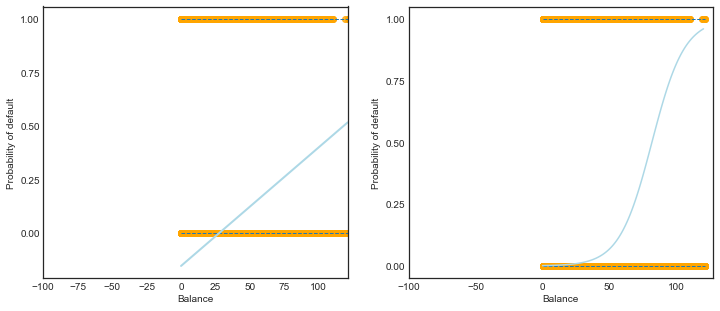

In [35]:
X_train = df.EDAD.values.reshape(-1,1) 
y = df.Muerto

# Create array of test data. Calculate the classification probability
# and predicted classification.
X_test = np.arange(df.EDAD.min(), df.EDAD.max()).reshape(-1,1)

clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(X_train,y)
prob = clf.predict_proba(X_test)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
# Left plot
sns.regplot(df.EDAD, df.Muerto, order=1, ci=None,
            scatter_kws={'color':'orange'},
            line_kws={'color':'lightblue', 'lw':2}, ax=ax1)
# Right plot
ax2.scatter(X_train, y, color='orange')
ax2.plot(X_test, prob[:,1], color='lightblue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
              xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Probability of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.])
    ax.set_xlim(xmin=-100)

# scikitlearn

In [36]:
# Using newton-cg solver, the coefficients are equal/closest to the ones in the book. 
# I do not know the details on the differences between the solvers.
clf = skl_lm.LogisticRegression(solver='newton-cg')
X_train = df.EDAD.values.reshape(-1,1)
clf.fit(X_train,y)
print(clf)
print('classes: ',clf.classes_)
print('coefficients: ',clf.coef_)
print('intercept :', clf.intercept_)

LogisticRegression(solver='newton-cg')
classes:  [0 1]
coefficients:  [[0.08238202]]
intercept : [-6.71561914]


C:\Users\jgeis\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\jgeis\anaconda3\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


### Statsmodels

In [37]:
X_train = sm.add_constant(df.EDAD)
est = smf.Logit(y.ravel(), X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.206160
         Iterations 8


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-6.715619,0.008684,-773.338818,0.0,-6.732639,-6.698599
EDAD,0.082382,0.000142,579.181688,0.0,0.082103,0.082661


In [38]:
X_train = sm.add_constant(df.dias_sintomas_ingreso)
y = df.Muerto

est = smf.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.260357
         Iterations 7


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-3.084262,0.003313,-931.095826,0.0,-3.090754,-3.077769
dias_sintomas_ingreso,0.133521,0.000522,255.690225,0.0,0.132497,0.134544


In [39]:
###  Table 4.3 - Multiple Logistic Regression

In [40]:
X_train = sm.add_constant(df[['EDAD', 'dias_sintomas_ingreso', 'UCI','HOSPITALIZADO','SEXO']])
est = smf.Logit(y, X_train).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.130278
         Iterations 9


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-7.395737,0.012273,-602.610569,0.000000e+00,-7.419791,-7.371683
EDAD,0.049924,0.000176,283.097376,0.000000e+00,0.049578,0.050269
dias_sintomas_ingreso,0.010730,0.000691,15.525458,2.333332e-54,0.009376,0.012085
UCI,0.578000,0.010802,53.507789,0.000000e+00,0.556828,0.599171
HOSPITALIZADO,3.971524,0.007716,514.681953,0.000000e+00,3.956400,3.986648
SEXO,0.326959,0.005424,60.276232,0.000000e+00,0.316328,0.337591


In [41]:
### Figura 4.3 - Confounding

In [42]:
# Edad y muerte según HOSPITALIZADO, recuerde que HOSPITALIZADO == 1 es que sí fue hospitalizado
# balance and default vectors for students
X_train = df[df.HOSPITALIZADO == 1].EDAD.values.reshape(df[df.HOSPITALIZADO == 1].EDAD.size,1) 
y = df[df.HOSPITALIZADO == 1].Muerto

# balance and default vectors for non-students
X_train2 = df[df.HOSPITALIZADO == 0].EDAD.values.reshape(df[df.HOSPITALIZADO == 0].EDAD.size,1) 
y2 = df[df.HOSPITALIZADO == 0].Muerto

# Vector with balance values for plotting
X_test = np.arange(df.EDAD.min(), df.EDAD.max()).reshape(-1,1)

#clf = skl_lm.LogisticRegression(solver='newton-cg')
#clf2 = skl_lm.LogisticRegression(solver='newton-cg')
clf = skl_lm.LogisticRegression()
clf2 = skl_lm.LogisticRegression()

clf.fit(X_train,y)
clf2.fit(X_train2,y2)

prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

In [43]:
df.groupby(['HOSPITALIZADO','Muerto']).size().unstack('Muerto')

Muerto,0,1
HOSPITALIZADO,,
0,2986293,21399
1,314986,250366


C:\Users\jgeis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


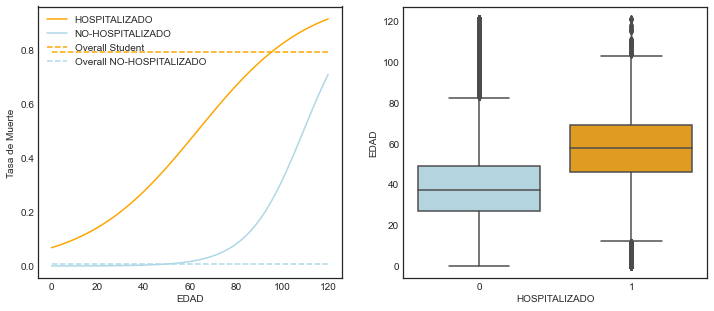

In [44]:
# creating plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.plot(X_test, pd.DataFrame(prob)[1], color='orange', label='HOSPITALIZADO')
ax1.plot(X_test, pd.DataFrame(prob2)[1], color='lightblue', label='NO-HOSPITALIZADO')
ax1.hlines(233590/295677, colors='orange', label='Overall Student',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(20876/2699735, colors='lightblue', label='Overall NO-HOSPITALIZADO',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Tasa de Muerte')
ax1.set_xlabel('EDAD')
#ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
#ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# Right plot
sns.boxplot('HOSPITALIZADO', 'EDAD', data=df, orient='v', ax=ax2,  palette=c_palette);

In [45]:
#OJO, no puedo modificar la edad de las personas, puedo modificar el  número de días entre síntomas e ingreso
#Haremos un modelo que, en lugar de Edad, tome los días entres síntomas e ingreso (atención temprana)

In [46]:
### Figura 4.3 - Confounding (2)

In [47]:
# dias_sintomas_ingreso y muerte según HOSPITALIZADO, recuerde que HOSPITALIZADO == 1 es que sí fue hospitalizado
# balance and default vectors for students
X_train = df[df.HOSPITALIZADO == 1].dias_sintomas_ingreso.values.reshape(df[df.HOSPITALIZADO == 1].dias_sintomas_ingreso.size,1) 
y = df[df.HOSPITALIZADO == 1].Muerto

# balance and default vectors for non-students
X_train2 = df[df.HOSPITALIZADO == 0].dias_sintomas_ingreso.values.reshape(df[df.HOSPITALIZADO == 0].dias_sintomas_ingreso.size,1) 
y2 = df[df.HOSPITALIZADO == 0].Muerto

# Vector with balance values for plotting
X_test = np.arange(df.dias_sintomas_ingreso.min(), df.dias_sintomas_ingreso.max()).reshape(-1,1)

#clf = skl_lm.LogisticRegression(solver='newton-cg')
#clf2 = skl_lm.LogisticRegression(solver='newton-cg')
clf = skl_lm.LogisticRegression()
clf2 = skl_lm.LogisticRegression()

clf.fit(X_train,y)
clf2.fit(X_train2,y2)

prob = clf.predict_proba(X_test)
prob2 = clf2.predict_proba(X_test)

In [48]:
df.groupby(['HOSPITALIZADO','Muerto']).size().unstack('Muerto')

Muerto,0,1
HOSPITALIZADO,,
0,2986293,21399
1,314986,250366


C:\Users\jgeis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


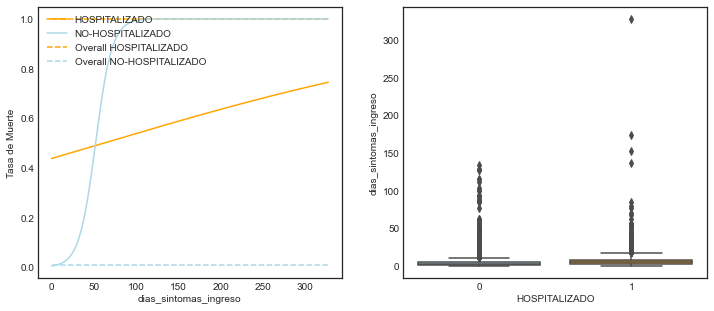

In [49]:
# creating plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.plot(X_test, pd.DataFrame(prob)[1], color='orange', label='HOSPITALIZADO')
ax1.plot(X_test, pd.DataFrame(prob2)[1], color='lightblue', label='NO-HOSPITALIZADO')
ax1.hlines(233590/233590, colors='orange', label='Overall HOSPITALIZADO',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.hlines(20876/2699735, colors='lightblue', label='Overall NO-HOSPITALIZADO',
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dashed')
ax1.set_ylabel('Tasa de Muerte')
ax1.set_xlabel('dias_sintomas_ingreso')
#ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.])
#ax1.set_xlim(450,2500)
ax1.legend(loc=2)

# Right plot
sns.boxplot('HOSPITALIZADO', 'dias_sintomas_ingreso', data=df, orient='v', ax=ax2,  palette=c_palette);